In [1]:
pip install scikit-learn numpy pandas matplotlib


Note: you may need to restart the kernel to use updated packages.


In [2]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o', s=100, label='test set')
    plt.legend(loc='upper left')
    plt.show()

In [3]:
#Exercise1
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = load_iris()
X = iris.data[:, [2, 3]]  # Petal length and width
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

print("Class distribution:", np.bincount(y_train))


#2 make_moon

from sklearn.datasets import make_moons

# Generate nonlinear dataset
X_moons, y_moons = make_moons(n_samples=200, noise=0.2, random_state=1)

# Split into train/test
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_moons, y_moons, test_size=0.3, random_state=1, stratify=y_moons
)

# Standardize
sc_m = StandardScaler()
sc_m.fit(X_train_m)
X_train_m_std = sc_m.transform(X_train_m)
X_test_m_std = sc_m.transform(X_test_m)

# Combine
X_combined_m_std = np.vstack((X_train_m_std, X_test_m_std))
y_combined_m = np.hstack((y_train_m, y_test_m))

print("Moons class distribution:", np.bincount(y_train_m))

Class distribution: [35 35 35]
Moons class distribution: [70 70]


Accuracy: 0.9777777777777777


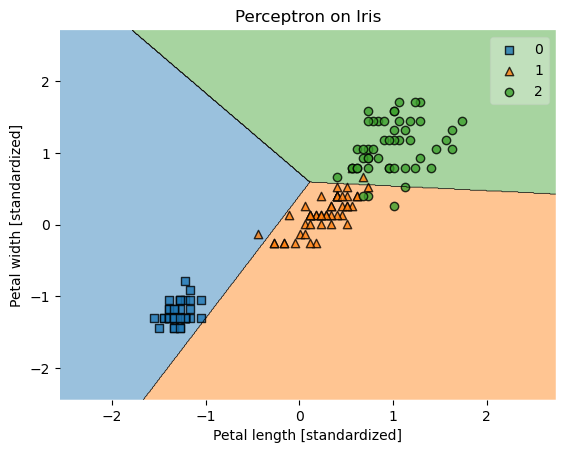

Moons Accuracy: 0.8666666666666667


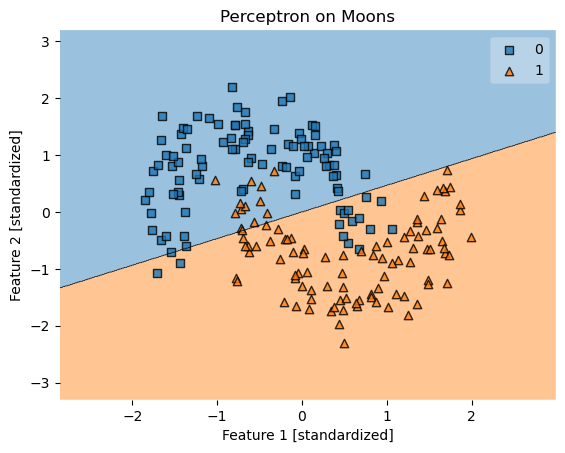

In [4]:
#Exercise 2: Perceptron

from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Train Perceptron
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

# Predictions
y_pred = ppn.predict(X_test_std)
print('Accuracy:', accuracy_score(y_test, y_pred))

# Plot decision boundary
plot_decision_regions(X_combined_std, y_combined, clf=ppn)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.title('Perceptron on Iris')
plt.savefig("Perceptron on Iris.png", dpi=300, bbox_inches='tight')
plt.show()


#2 make moon

# Train on moons dataset
ppn_m = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn_m.fit(X_train_m_std, y_train_m)

y_pred_m = ppn_m.predict(X_test_m_std)
print('Moons Accuracy:', accuracy_score(y_test_m, y_pred_m))

plot_decision_regions(X_combined_m_std, y_combined_m, clf=ppn_m)
plt.xlabel('Feature 1 [standardized]')
plt.ylabel('Feature 2 [standardized]')
plt.title('Perceptron on Moons')
plt.savefig("Perceptron on Moons.png", dpi=300, bbox_inches='tight')
plt.show()

Moons dataset accuracy: 0.9333333333333333


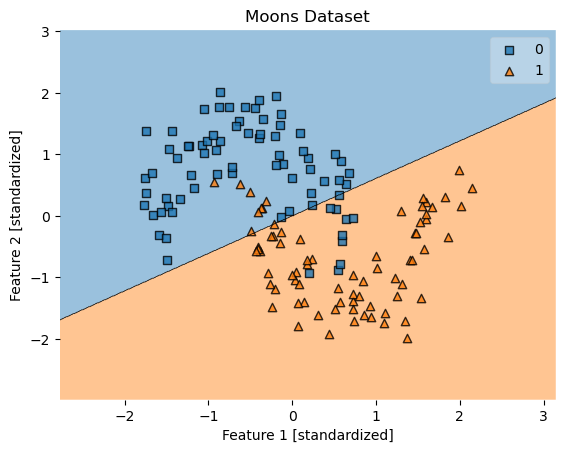

In [5]:
#Exercise 3

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Generate moons dataset (nonlinear)
X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=1)

# Split and standardize
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_moons, y_moons, test_size=0.3, random_state=1, stratify=y_moons
)
sc_m = StandardScaler()
X_train_m_std = sc_m.fit_transform(X_train_m)
X_test_m_std = sc_m.transform(X_test_m)

# Train Perceptron
ppn_moons = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn_moons.fit(X_train_m_std, y_train_m)

y_pred_m = ppn_moons.predict(X_test_m_std)
print('Moons dataset accuracy:', accuracy_score(y_test_m, y_pred_m))

plot_decision_regions(np.vstack((X_train_m_std, X_test_m_std)), 
                      np.hstack((y_train_m, y_test_m)), 
                      clf=ppn_moons)

plt.xlabel('Feature 1 [standardized]')
plt.ylabel('Feature 2 [standardized]')
plt.title('Moons Dataset')
plt.savefig("Moons_Dataset.png", dpi=300, bbox_inches='tight')
plt.show()



C:\Users\matsh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


C=0.01, Accuracy=0.689


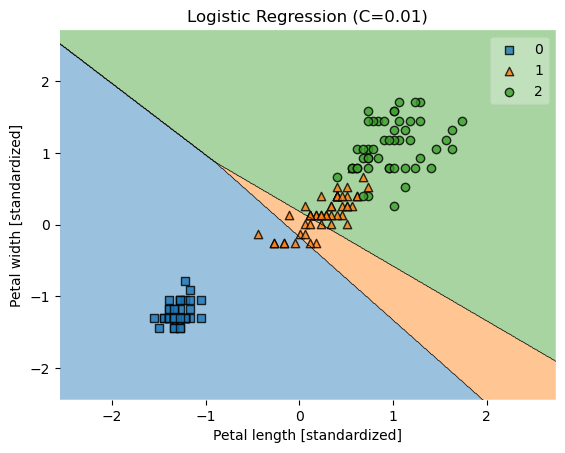

C:\Users\matsh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


C=1.0, Accuracy=0.978


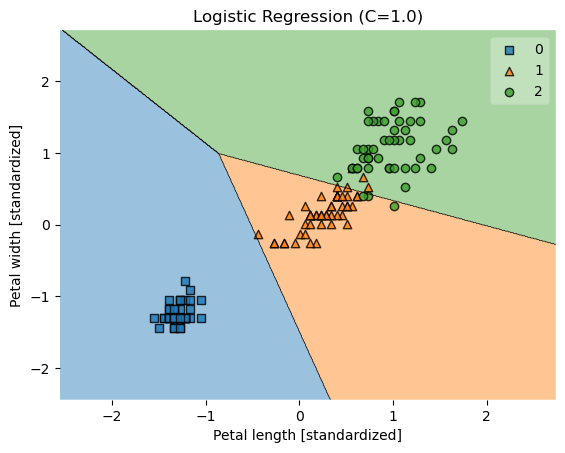

C:\Users\matsh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


C=100.0, Accuracy=0.978


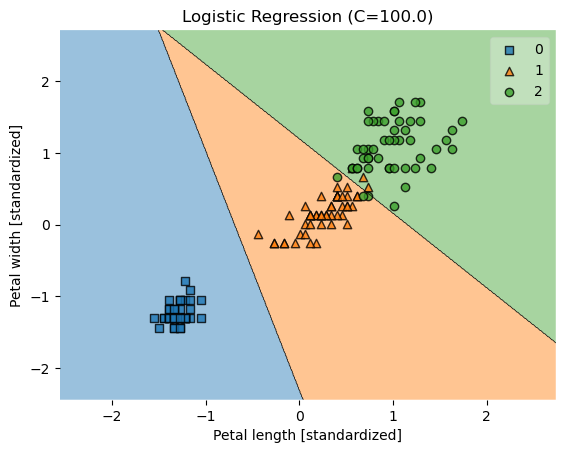

In [6]:
#Exercise 3 Logistic Regression

from sklearn.linear_model import LogisticRegression

for c in [0.01, 1.0, 100.0]:
    lr = LogisticRegression(C=c, random_state=1, solver='lbfgs', multi_class='ovr')
    lr.fit(X_train_std, y_train)
    y_pred = lr.predict(X_test_std)
    
    print(f"C={c}, Accuracy={accuracy_score(y_test, y_pred):.3f}")
    
    plot_decision_regions(X_combined_std, y_combined, clf=lr)
    plt.xlabel('Petal length [standardized]')
    plt.ylabel('Petal width [standardized]')
    plt.title(f'Logistic Regression (C={c})')
    plt.savefig(f"logistic_regression_C{c}.png", dpi=300, bbox_inches='tight')
    plt.show()

Accuracy (C=100): 0.9777777777777777
Support vectors (C=100):
 [[-1.05383474 -1.04507821]
 [-1.16537974 -0.91397521]
 [-0.27301968 -0.2584602 ]
 [ 0.61934037  0.3970548 ]
 [ 0.61934037  0.3970548 ]
 [ 0.56356787  0.79036381]
 [ 0.73088538  0.5281578 ]
 [ 0.67511288  0.65926081]
 [ 0.56356787  0.79036381]
 [ 1.0097479   0.2659518 ]
 [ 0.56356787  0.79036381]
 [ 0.61934037  0.79036381]
 [ 0.73088538  0.3970548 ]
 [ 0.67511288  0.3970548 ]]


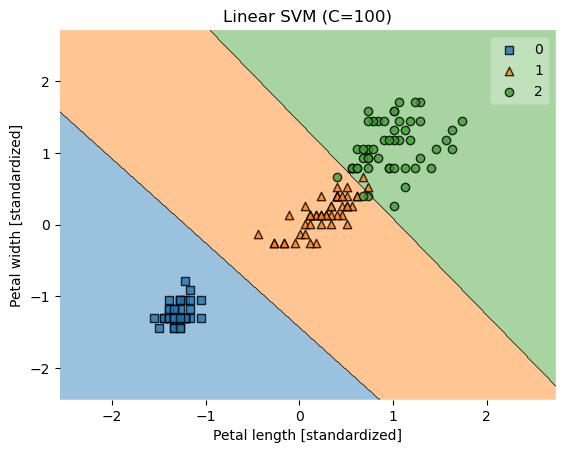

In [7]:
#Exercise 4 Support Vector Machines (SVM)    

from sklearn.svm import SVC

svm_highC = SVC(kernel='linear', C=100.0, random_state=1)
svm_highC.fit(X_train_std, y_train)

y_pred_highC = svm_highC.predict(X_test_std)
print('Accuracy (C=100):', accuracy_score(y_test, y_pred_highC))
print("Support vectors (C=100):\n", svm_highC.support_vectors_)

plot_decision_regions(X_combined_std, y_combined, clf=svm_highC)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.title('Linear SVM (C=100)')
plt.savefig("Linear_SVM.png", dpi=300, bbox_inches='tight')
plt.show()


In [8]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


Gamma=0.01, Accuracy=0.800


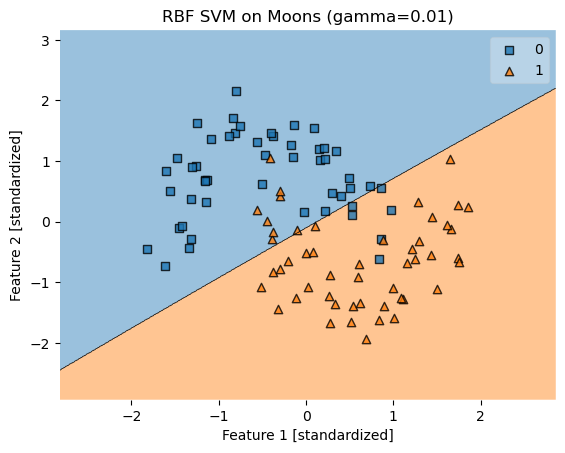

Gamma=1, Accuracy=0.867


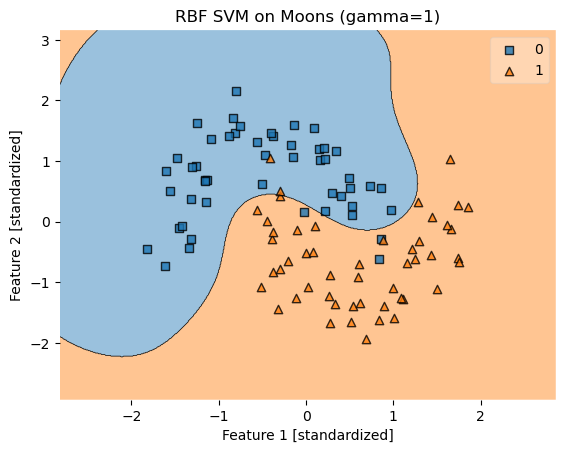

Gamma=100, Accuracy=0.867


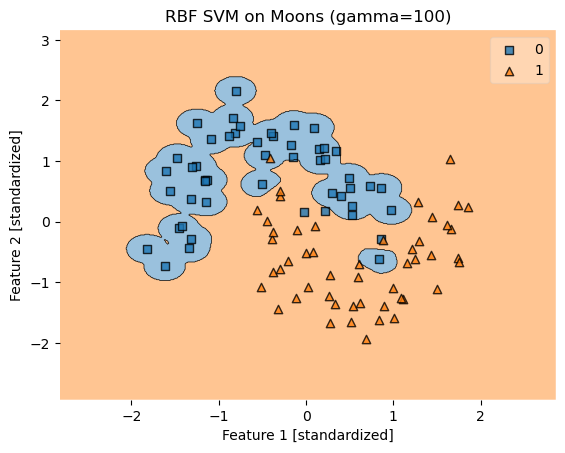

Linear SVM Accuracy: 0.9777777777777777
RBF SVM Accuracy: 0.9777777777777777


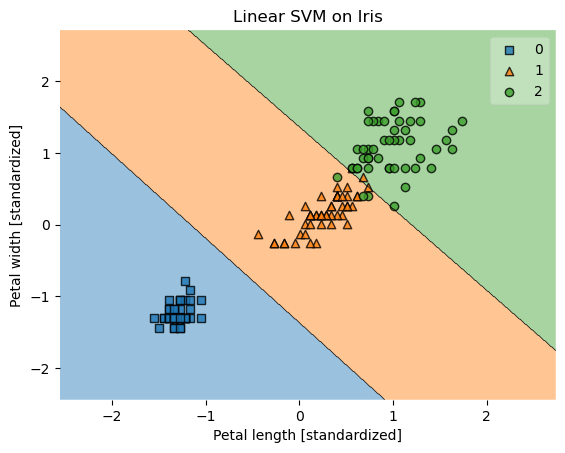

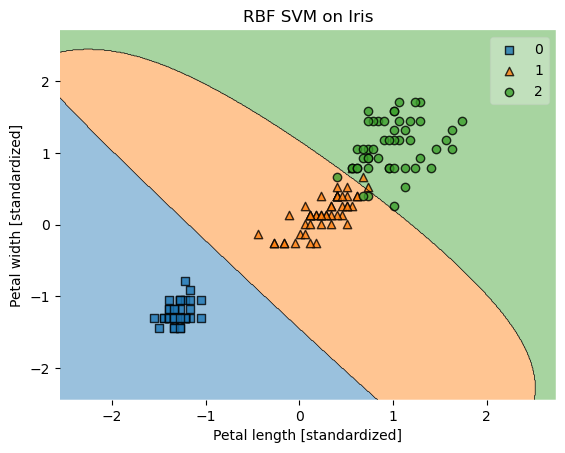

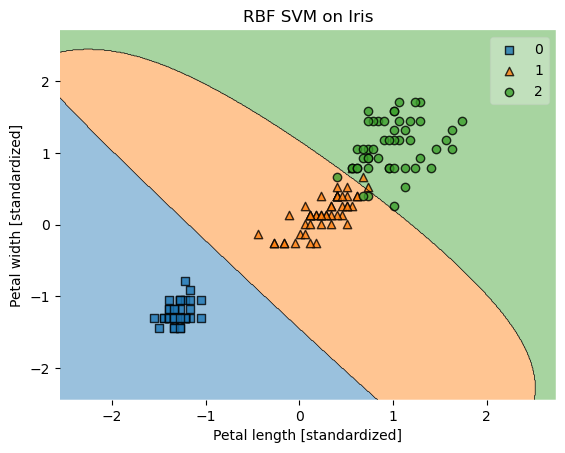

In [9]:
#Exercise 5 Kernel SVM

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np

# Generate moons dataset
X_moons, y_moons = make_moons(n_samples=100, noise=0.2, random_state=123)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_moons, y_moons, test_size=0.3, random_state=1)

# Standardize
sc_m = StandardScaler()
X_train_m_std = sc_m.fit_transform(X_train_m)
X_test_m_std = sc_m.transform(X_test_m)
X_combined_m_std = np.vstack((X_train_m_std, X_test_m_std))
y_combined_m = np.hstack((y_train_m, y_test_m))

# Tune gamma
gamma_values = [0.01, 1, 100]

for gamma_val in gamma_values:
    svm_rbf = SVC(kernel='rbf', gamma=gamma_val, C=1.0, random_state=1)
    svm_rbf.fit(X_train_m_std, y_train_m)
    
    y_pred_m = svm_rbf.predict(X_test_m_std)
    print(f"Gamma={gamma_val}, Accuracy={accuracy_score(y_test_m, y_pred_m):.3f}")
    
    # Create new figure for each gamma to avoid overlapping plots
    plt.figure()
# If your version expects 'clf' instead of 'classifier'
    plot_decision_regions(X_combined_m_std, y_combined_m, clf=svm_rbf)
    plt.title(f'RBF SVM on Moons (gamma={gamma_val})')
    plt.xlabel('Feature 1 [standardized]')
    plt.ylabel('Feature 2 [standardized]')
    plt.show()

#2 iris

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import numpy as np

# Load Iris dataset (petal length & width only)
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

# Standardize
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# Linear SVM
svm_linear = SVC(kernel='linear', C=1.0, random_state=1)
svm_linear.fit(X_train_std, y_train)
print("Linear SVM Accuracy:", accuracy_score(y_test, svm_linear.predict(X_test_std)))

# RBF SVM
svm_rbf_iris = SVC(kernel='rbf', gamma=0.2, C=1.0, random_state=1)
svm_rbf_iris.fit(X_train_std, y_train)
print("RBF SVM Accuracy:", accuracy_score(y_test, svm_rbf_iris.predict(X_test_std)))

# Plot Linear SVM
plt.figure()
plot_decision_regions(X_combined_std, y_combined, clf=svm_linear)
plt.title('Linear SVM on Iris')
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.show()

# Plot RBF SVM
plt.figure()
plot_decision_regions(X_combined_std, y_combined, clf=svm_rbf_iris)
plt.title('RBF SVM on Iris')
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.show()

# RBF SVM plot
plt.figure()
plot_decision_regions(X_combined_std, y_combined, clf=svm_rbf_iris)
plt.title('RBF SVM on Iris')
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.show()

Accuracy: 0.9777777777777777


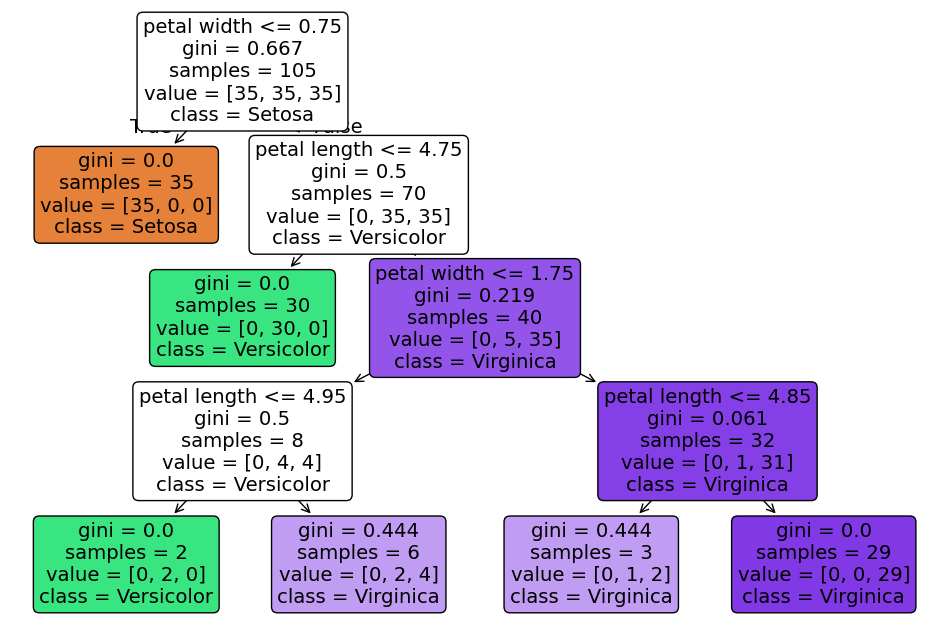

Max depth=1, Accuracy=0.667


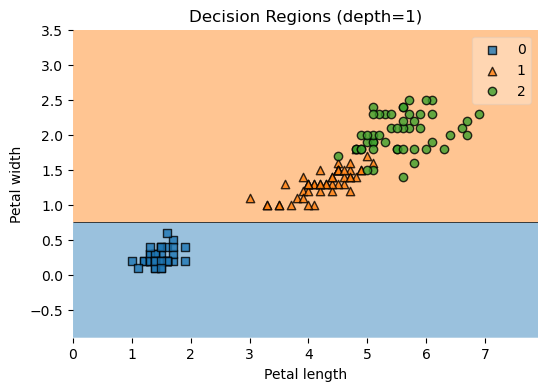

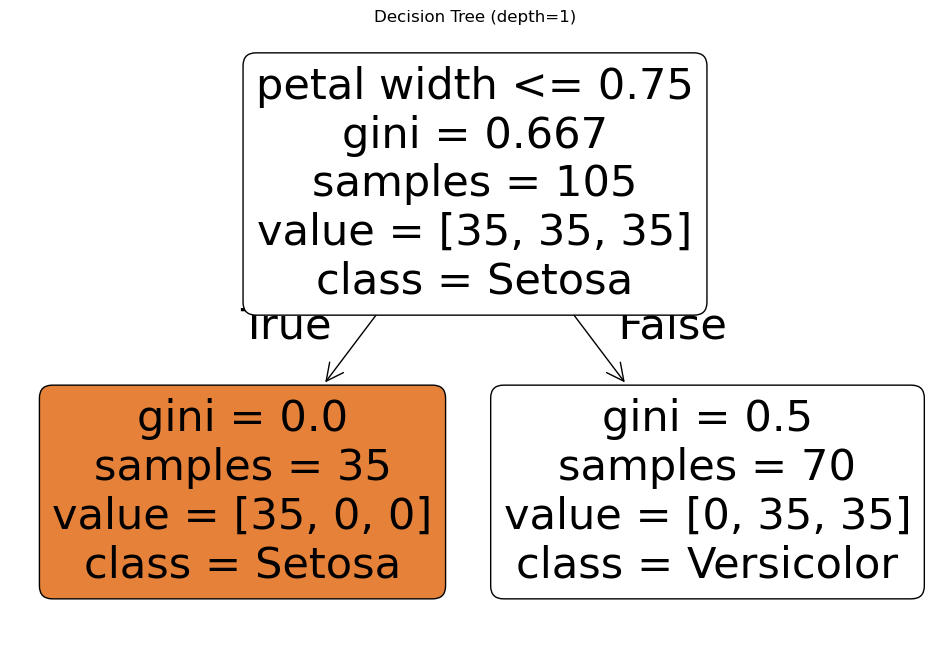

Max depth=2, Accuracy=0.956


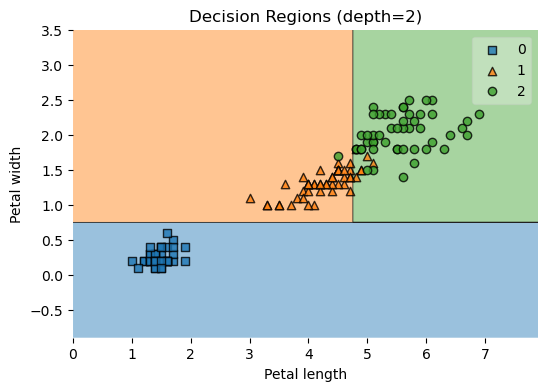

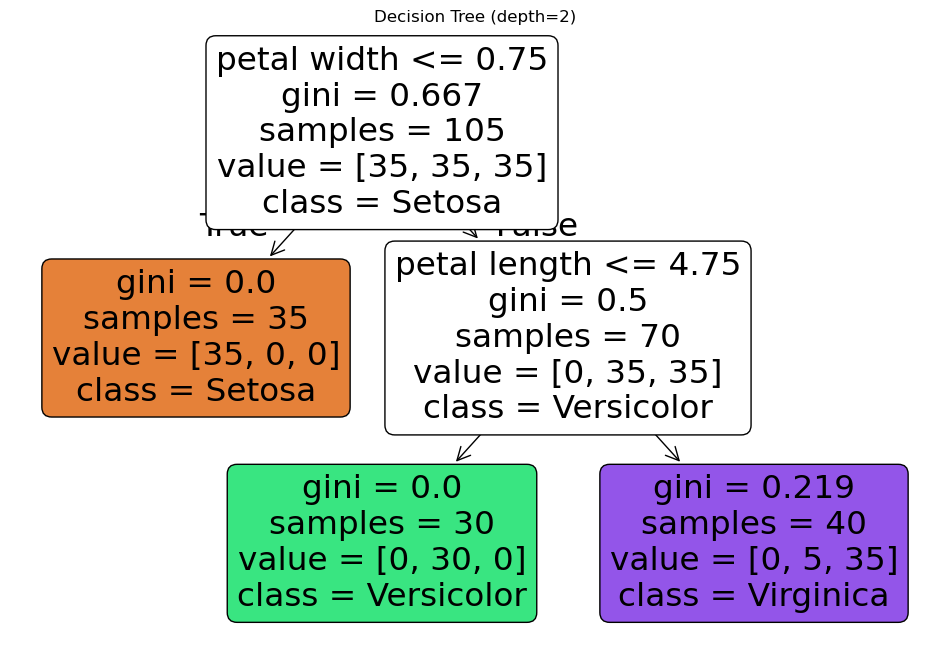

Max depth=3, Accuracy=0.978


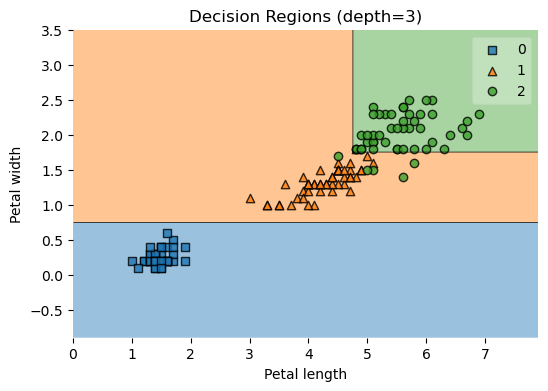

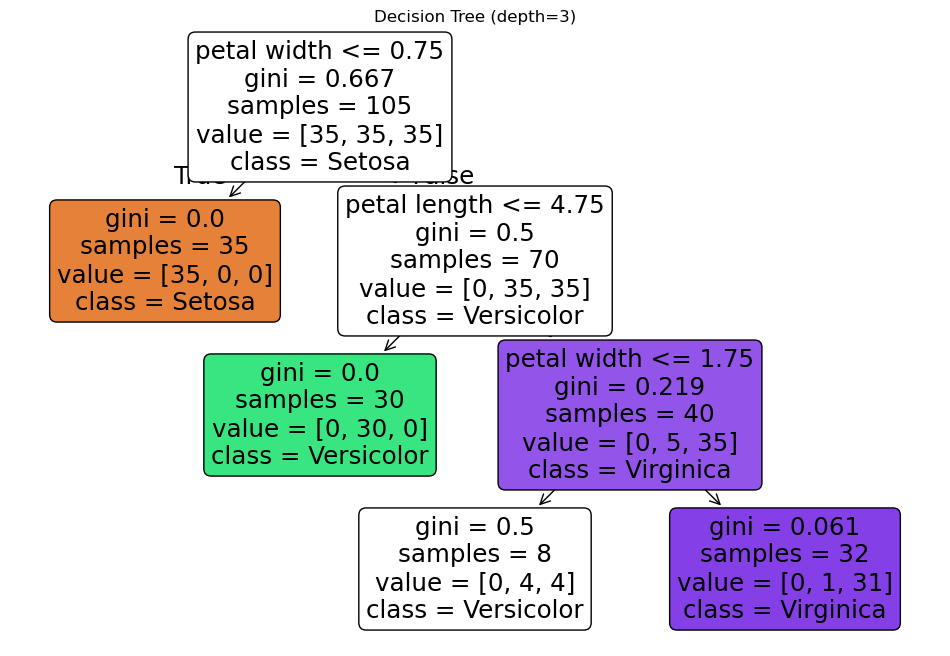

Max depth=4, Accuracy=0.978


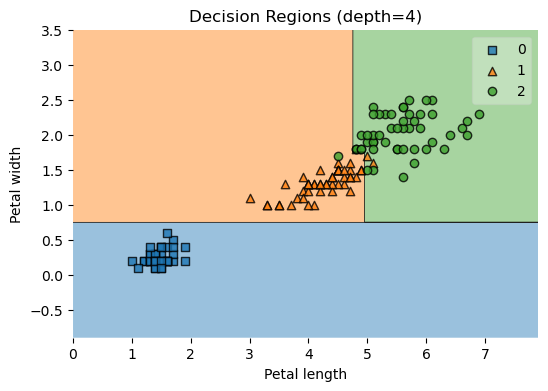

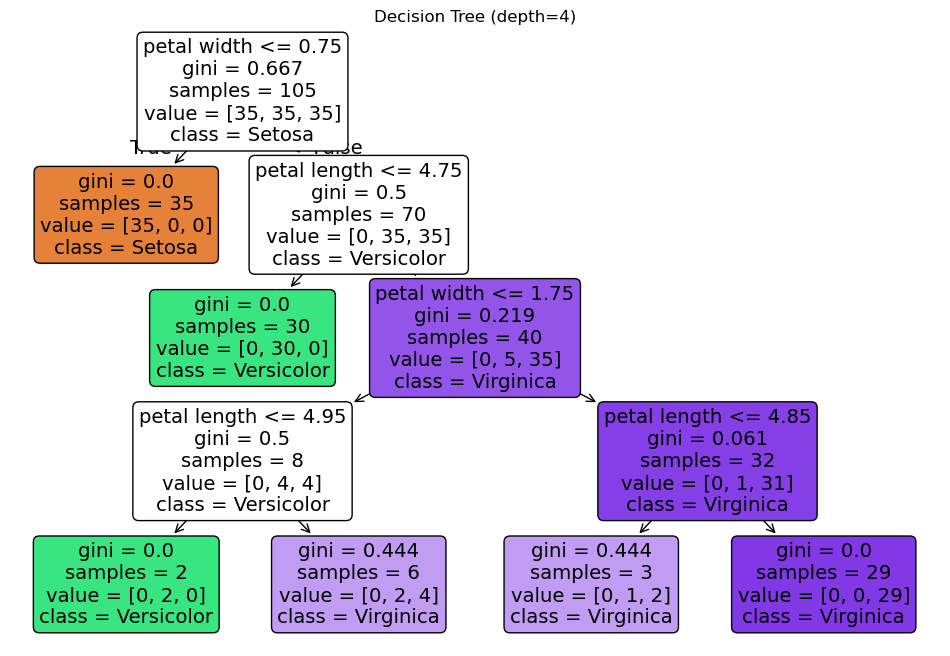

Max depth=5, Accuracy=0.978


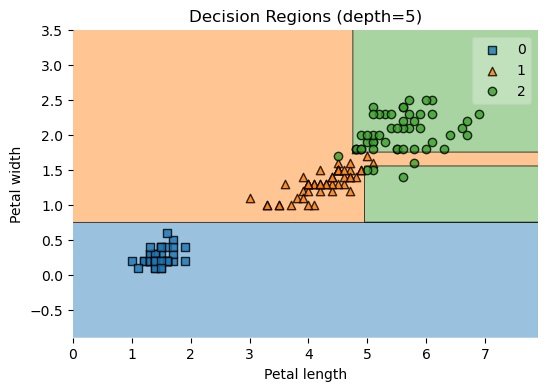

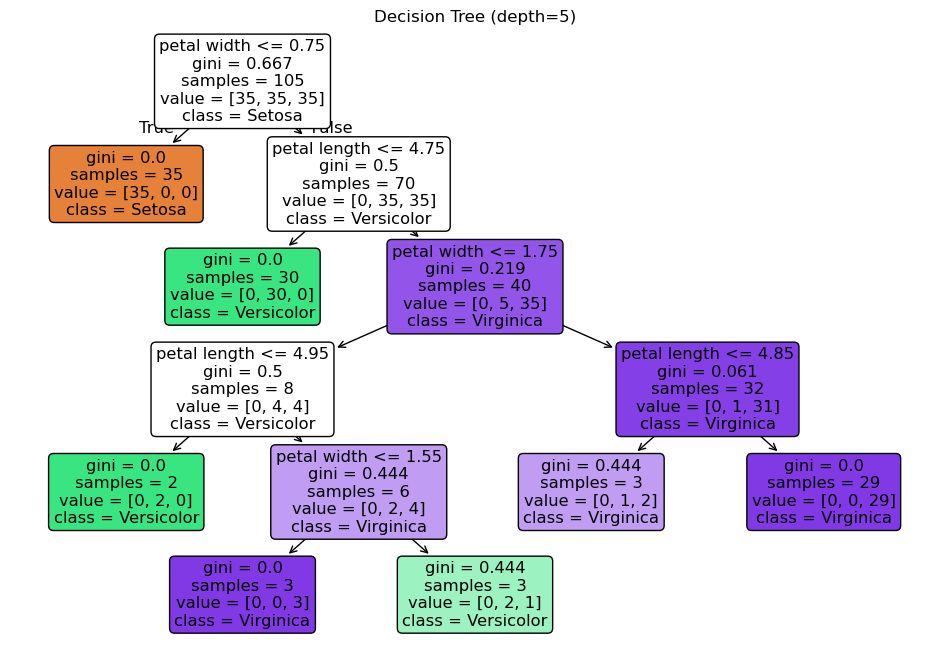

Max depth=6, Accuracy=0.978


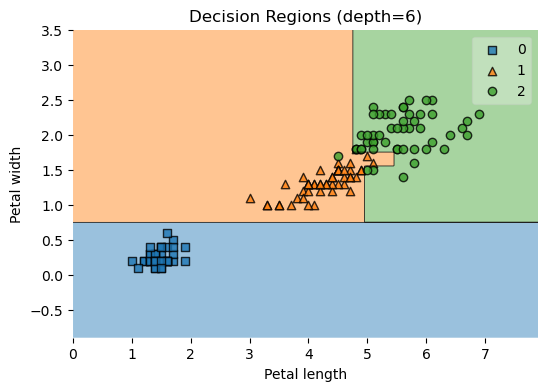

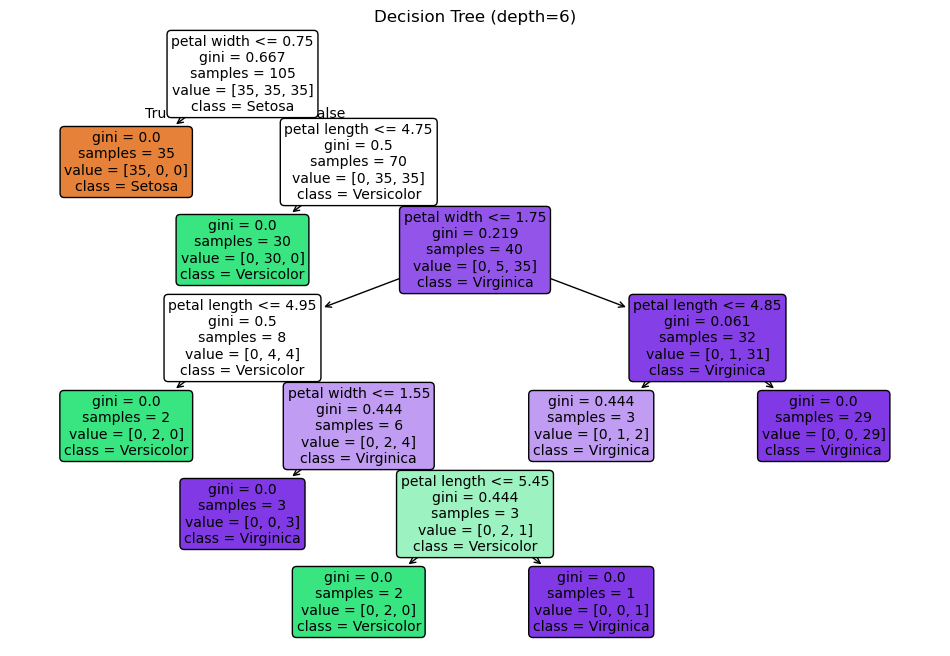

Max depth=7, Accuracy=0.978


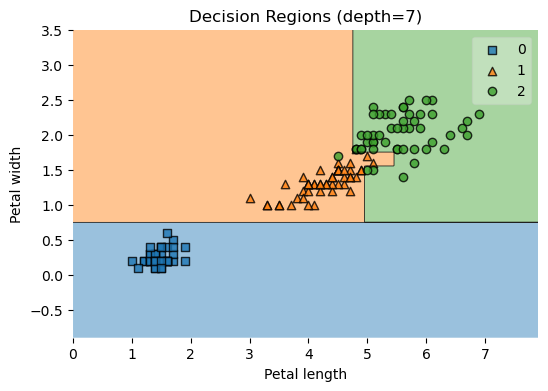

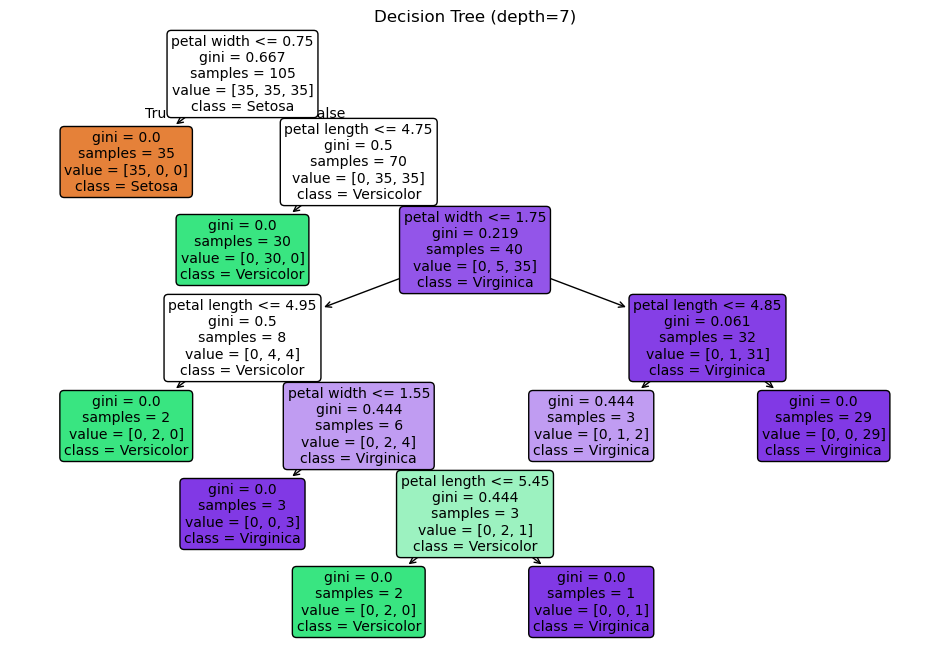

Max depth=8, Accuracy=0.978


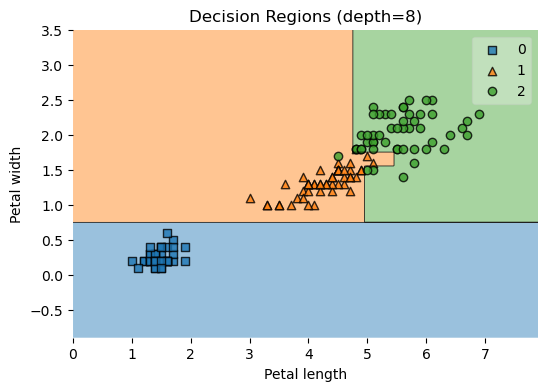

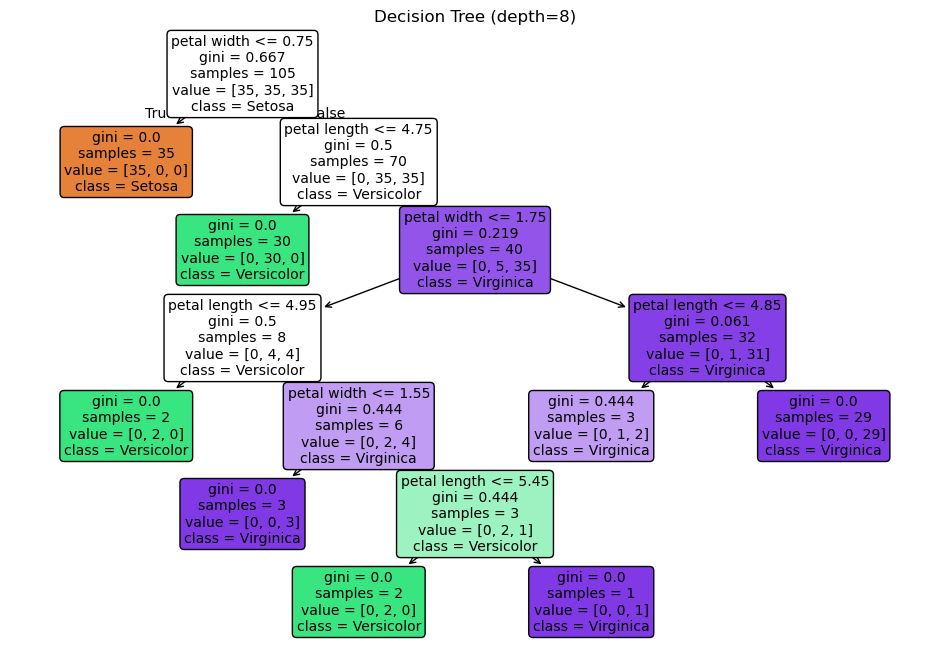

Max depth=9, Accuracy=0.978


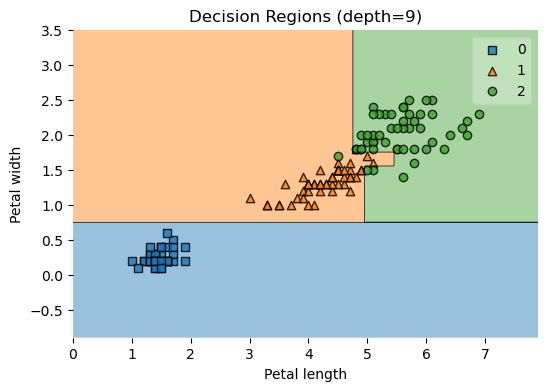

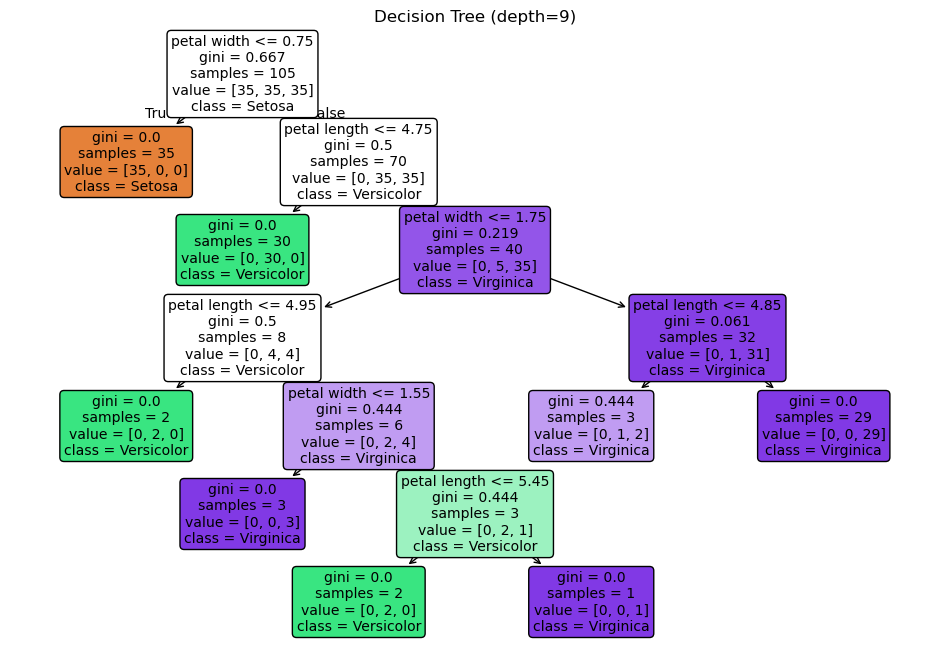

Max depth=10, Accuracy=0.978


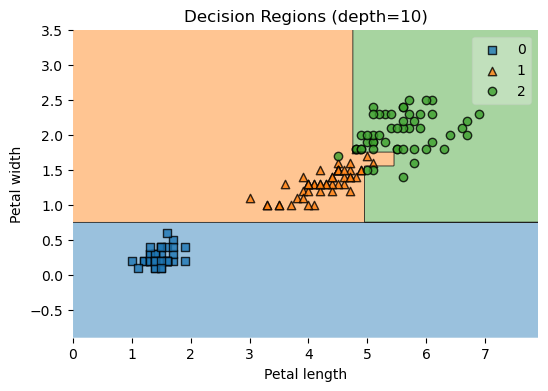

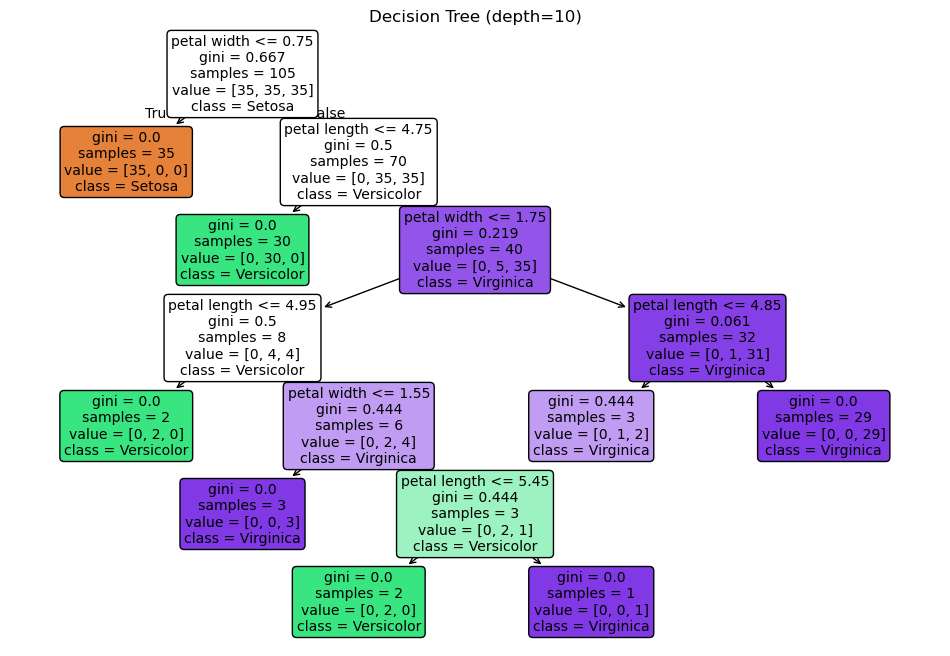

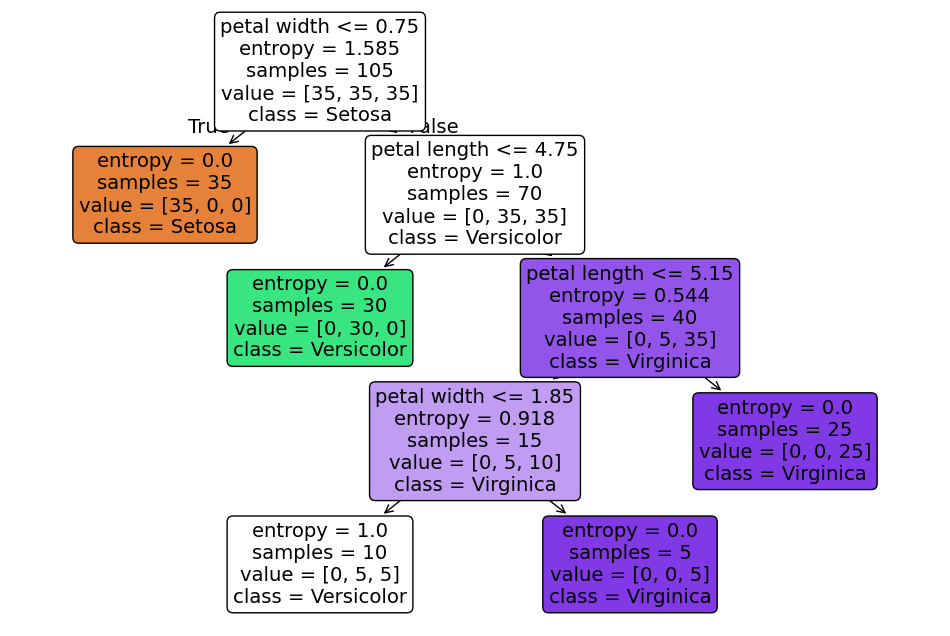

In [10]:
#Exercise 6 Decision Trees

from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Train your decision tree
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)

# Predictions
y_pred = tree.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

# Plot tree
plt.figure(figsize=(12,8))
plot_tree(tree, 
          feature_names=['petal length', 'petal width'],
          class_names=['Setosa', 'Versicolor', 'Virginica'],
          filled=True,
          rounded=True)
plt.show()


#1 gini

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

for depth in range(1, 11):
    # Train tree
    tree = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=1)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    
    # Print accuracy
    print(f"Max depth={depth}, Accuracy={accuracy_score(y_test, y_pred):.3f}")
    
    # Plot decision regions
    X_combined = np.vstack((X_train, X_test))
    plt.figure(figsize=(6,4))
    plot_decision_regions(X_combined, y_combined, clf=tree)
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.title(f'Decision Regions (depth={depth})')
    plt.show()
    
    # Plot the decision tree
    plt.figure(figsize=(12,8))
    plot_tree(tree, 
              feature_names=['petal length', 'petal width'],
              class_names=['Setosa', 'Versicolor', 'Virginica'],
              filled=True, rounded=True)
    plt.title(f"Decision Tree (depth={depth})")
    plt.show()


#2 entropy
from sklearn.tree import DecisionTreeClassifier


tree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)
tree_entropy.fit(X_train, y_train)

plt.figure(figsize=(12,8))
plot_tree(tree_entropy, 
          feature_names=['petal length', 'petal width'],
          class_names=['Setosa', 'Versicolor', 'Virginica'],
          filled=True,
          rounded=True)
plt.show()


Accuracy: 0.9777777777777777
Feature Importances: [0.48273366 0.51726634]


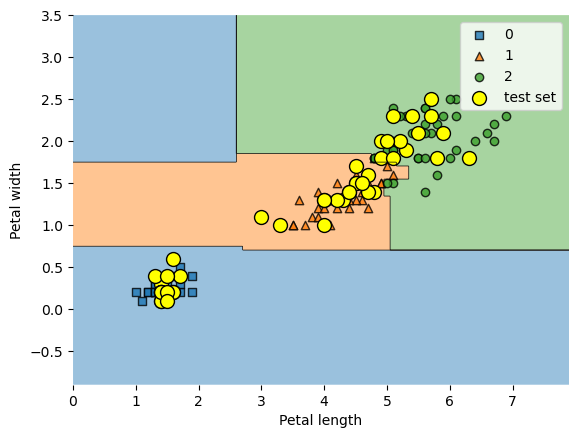

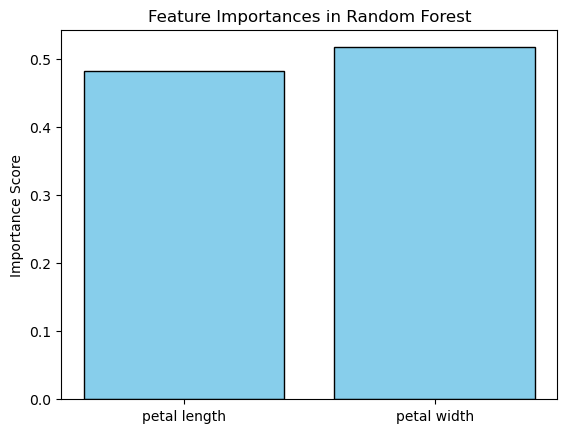

In [11]:
#Exercise7
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Train Random Forest with more trees
forest = RandomForestClassifier(
    criterion='gini',
    n_estimators=100,   # Increased from 25 → 100
    random_state=1,
    n_jobs=2
)
forest.fit(X_train, y_train)

# Predictions
y_pred = forest.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Feature Importances:', forest.feature_importances_)

# Plot decision boundary
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, clf=forest)

# highlight test set manually
plt.scatter(X_test[:, 0], X_test[:, 1],
            c='yellow', edgecolor='black', marker='o', s=100, label='test set')

plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend()
plt.show()

# Plot feature importances
features = ['petal length', 'petal width']
importances = forest.feature_importances_

plt.bar(features, importances, color='skyblue', edgecolor='black')
plt.title("Feature Importances in Random Forest")
plt.ylabel("Importance Score")
plt.show()


n_neighbors = 1 | Accuracy: 0.978


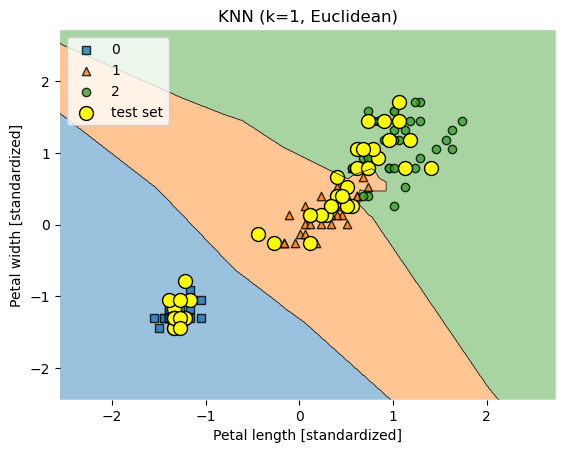

n_neighbors = 5 | Accuracy: 1.000


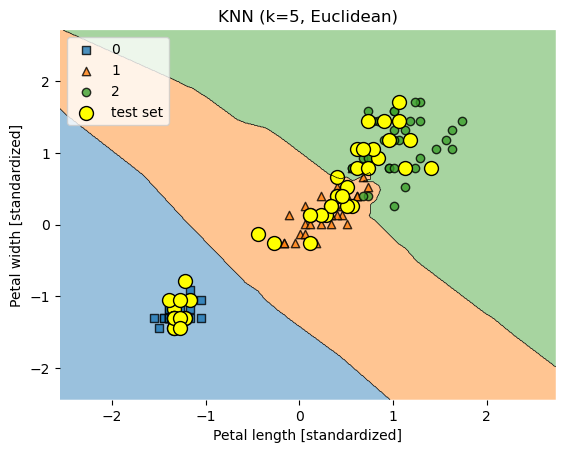

n_neighbors = 10 | Accuracy: 0.978


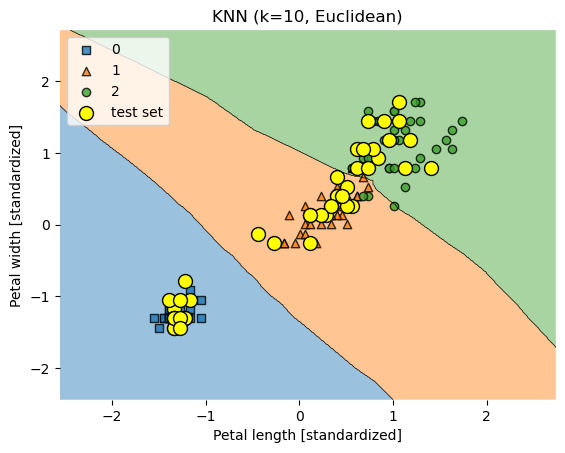

Manhattan Distance (k=5) | Accuracy: 0.978


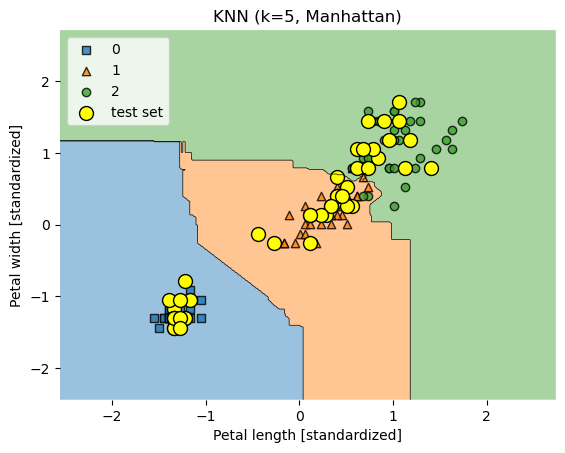

In [12]:
#Exercise 8: K-Nearest Neighbors (KNN)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Try different values of n_neighbors
for k in [1, 5, 10]:
    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')  # Euclidean distance
    knn.fit(X_train_std, y_train)
    
    y_pred = knn.predict(X_test_std)
    print(f'n_neighbors = {k} | Accuracy: {accuracy_score(y_test, y_pred):.3f}')
    
    # Plot decision regions
    plot_decision_regions(X_combined_std, y_combined, clf=knn)
    
    # highlight test set manually
    plt.scatter(X_test_std[:, 0], X_test_std[:, 1],
                c='yellow', edgecolor='black', marker='o', s=100, label='test set')
    
    plt.xlabel('Petal length [standardized]')
    plt.ylabel('Petal width [standardized]')
    plt.title(f'KNN (k={k}, Euclidean)')
    plt.legend()
    plt.show()


# Now using Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=5, p=1, metric='minkowski')  # Manhattan distance
knn_manhattan.fit(X_train_std, y_train)

y_pred_manhattan = knn_manhattan.predict(X_test_std)
print(f'Manhattan Distance (k=5) | Accuracy: {accuracy_score(y_test, y_pred_manhattan):.3f}')

# Plot decision regions
plot_decision_regions(X_combined_std, y_combined, clf=knn_manhattan)

# highlight test set manually
plt.scatter(X_test_std[:, 0], X_test_std[:, 1],
            c='yellow', edgecolor='black', marker='o', s=100, label='test set')

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.title('KNN (k=5, Manhattan)')
plt.legend()
plt.show()


In [13]:
#Exercise 9: Hyperparameter Tuning and Comparison
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],   # Regularization strength
    'solver': ['liblinear', 'lbfgs']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=500), param_grid_lr, cv=5)
grid_lr.fit(X_train_std, y_train)

print("Logistic Regression best params:", grid_lr.best_params_)
print("Logistic Regression best CV score:", grid_lr.best_score_)


#2
from sklearn.neighbors import KNeighborsClassifier

# Define parameter grid
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 10],
    'p': [1, 2]  # Manhattan (1) or Euclidean (2)
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train_std, y_train)

print("KNN best params:", grid_knn.best_params_)
print("KNN best CV score:", grid_knn.best_score_)

from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. Perceptron
ppn = Perceptron(max_iter=1000, eta0=0.01, random_state=1)
ppn.fit(X_train_std, y_train)

# 2. Logistic Regression with GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid_lr = {'C':[0.01,0.1,1,10], 'solver':['liblinear','lbfgs']}
grid_lr = GridSearchCV(LogisticRegression(max_iter=500), param_grid_lr, cv=5)
grid_lr.fit(X_train_std, y_train)

# 3. SVM with GridSearchCV (example)
param_grid_svm = {'C':[0.1,1,10], 'gamma':[0.01,0.1,1], 'kernel':['rbf']}
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5)
grid_svm.fit(X_train_std, y_train)

# 4. Decision Tree
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)  # use original X_train if tree works better without scaling

# 5. Random Forest
forest = RandomForestClassifier(n_estimators=100, random_state=1)
forest.fit(X_train, y_train)

# 6. KNN with GridSearchCV
param_grid_knn = {'n_neighbors':[1,3,5,7], 'p':[1,2]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train_std, y_train)



# Assuming you already have trained models: ppn, lr, svm, tree, forest, knn
models = {
    'Perceptron': ppn,
    'LogReg': grid_lr.best_estimator_,
    'SVM': grid_svm.best_estimator_,
    'Tree': tree,
    'Forest': forest,
    'KNN': grid_knn.best_estimator_
}

# Predict and collect results
results = {}
for name, model in models.items():
    X_test_input = X_test_std if name in ['Perceptron', 'LogReg', 'SVM', 'KNN'] else X_test
    y_pred = model.predict(X_test_input)
    results[name] = accuracy_score(y_test, y_pred)

# Display results as a table
import pandas as pd
results_df = pd.DataFrame(list(results.items()), columns=['Classifier', 'Accuracy'])
print(results_df)

Logistic Regression best params: {'C': 0.1, 'solver': 'lbfgs'}
Logistic Regression best CV score: 0.9523809523809523
KNN best params: {'n_neighbors': 1, 'p': 1}
KNN best CV score: 0.9714285714285713
   Classifier  Accuracy
0  Perceptron  0.955556
1      LogReg  1.000000
2         SVM  0.977778
3        Tree  0.977778
4      Forest  0.977778
5         KNN  0.977778
